# Machine Learning

__Machine learning__ is a method of _data analysis_ that automates
_analytical model building_.
It is a branch of _artificial intelligence_ based on the idea that systems
can _learn from data_, _identify patterns_ and _make decisions_ with
minimal human intervention.

## Sci-kit Learn (SKlearn, Scipy, Numpy)

__Scikit-learn__ is a _Python package_ that provides a wide range of _machine learning algorithms_ and tools. 
It is built on top of _NumPy_, _SciPy_, and _Matplotlib_, and is designed to be simple and efficient for data analysis and modeling.

__Scikit-learn__ offers various modules for tasks such as _classification_, _regression_, _clustering_, _dimensionality reduction_, and _model selection_.
It also provides utilities for _preprocessing data_, _evaluating models_, and _handling datasets_.

With its extensive documentation and user-friendly interface, __Scikit-learn__ is widely used in the field of machine learning and data science.

In [9]:
#!pip install scikit-learn
import numpy as np
import pandas as pd
import sklearn

In [44]:
# spplitting the data into training and testing data
from sklearn.model_selection import train_test_split

# importing the dataset
titanic_df = pd.read_csv('datasets_kaggle/titanic.csv')
titanic_df = titanic_df[titanic_df['Age'].notna()]

# columns_list is a list of column names to be used as features
columns_list = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Splitting the data into features and target
X = titanic_df[columns_list]  # features
Y = titanic_df['Survived']  # target

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
889,1,male,26.0,0,0,30.0000,C


### K-Nearest Neighbors

__K-Nearest Neighbors__ is a simple algorithm that _stores all available
cases_ and _classifies_ new cases based on a similarity measure.

It is a type of _instance-based learning_, or _lazy learning_, where the
function is only approximated locally and all computation is deferred
until function evaluation.

In [8]:
# Arcaic K-Nearest Neighbors
import pandas as pd
import numpy as np

data = [(0,2,'A'), (3,7,'B'), (8,4,'A'), (3,8,'A'), (9,4,'B'), (3,6,'B'), (7,9,'A')]
df = pd.DataFrame(data, columns=['x', 'y', 'target'])
df

point = (2, 3)
k = 1

df['distance'] = np.sqrt((df['x'] - point[0])**2 + (df['y'] - point[1])**2)
df = df.sort_values(by='distance').iloc[:k]
df['target'].value_counts().idxmax()

'A'

In [45]:
# Classification of the data
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Feature scaling for better performance of KNN
scaler = StandardScaler()
columns_list = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X_train_scaled = scaler.fit_transform(X_train[columns_list])
X_test_scaled = scaler.transform(X_test[columns_list])

# Creating the KNN model
knn = KNeighborsClassifier(n_neighbors=20)

# Fitting the model with the training data
knn.fit(X_train_scaled, Y_train)

# Testing model performance
y_hat = knn.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, y_hat)
print(f'Accuracy: {accuracy}')
      
# Predicting the class for the new input
new_input = [1, 50, 1, 1, 50.0]
new_input_scaled = scaler.transform([new_input])
prediction = knn.predict(new_input_scaled)
print(f'Prediction: {prediction}')

Accuracy: 0.7116279069767442
Prediction: [1]


/home/ca-sierra-v/.pyenv/versions/3.11.9/envs/data_science_course/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Regression of the data
insurance_df = pd.read_csv('datasets_kaggle/insurance.csv')
columns_list = ['age', 'bmi', 'children'] #feature selection
X = insurance_df[columns_list]
Y = insurance_df['charges']
X_train, X_test, Y_insurance_train, Y_insurance_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Feature scaling for better performance of KNN
scaler = StandardScaler()
X_insurance_train_scaled = scaler.fit_transform(X_train)
X_insurance_test_scaled = scaler.transform(X_test)

# Creating the KNN model for regression
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fitting the model with the training data
knn_regressor.fit(X_insurance_train_scaled, Y_insurance_train)

# test the model performance
y_insurance_hat = knn_regressor.predict(X_insurance_test_scaled)
mse = mean_squared_error(Y_insurance_test, y_insurance_hat)

print(f'Mean Squared Error: {mse}')
results = pd.DataFrame({'Actual': Y_insurance_test, 'Predicted': y_insurance_hat})
results

Mean Squared Error: 155659348.66931483


,Actual,Predicted
764,9095.06825,13836.207640
887,5272.17580,7640.419550
890,29330.98315,19593.154220
1293,9301.89355,15001.987300
259,33750.29180,15380.318776
...,...,...
701,9541.69555,20112.831168
672,4399.73100,7631.381680
1163,2200.83085,10956.589710
1103,11363.28320,19513.503140


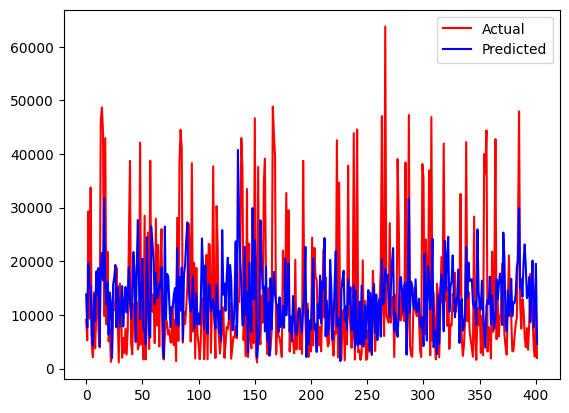

In [50]:
from matplotlib import pyplot as plt
x = np.arange(results.shape[0])
plt.plot(x, Y_test,color='red',label='Actual')
plt.plot(x, y_hat,color='blue',label='Predicted')
plt.legend()

### Linear Regression with Least Squares

__Linear regression__ is a type of _regression analysis_ used for predicting the value of a _continuous dependent variable_. It works by finding the _line that best fits the data_.

_Least squares_ is a method for finding the _best-fitting_ line by __minimizing__ the _sum of the squared differences_ between the predicted and actual values.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating the Linear Regression model
lr = LinearRegression()

# Fitting the model with the training data
lr.fit(X_insurance_train_scaled, Y_insurance_train)

# Predicting using test data
y_insurance_hat = lr.predict(X_insurance_test_scaled)
mse = mean_squared_error(Y_insurance_test, y_insurance_hat)

print(f'Mean Squared Error: {mse}')
results = pd.DataFrame({'Actual': Y_insurance_test, 'Predicted': y_insurance_hat})
results

Mean Squared Error: 127399626.37416688


,Actual,Predicted
764,9095.06825,13479.060198
887,5272.17580,11760.139427
890,29330.98315,17121.153895
1293,9301.89355,14541.043720
259,33750.29180,8504.099299
...,...,...
701,9541.69555,19907.659106
672,4399.73100,11652.762169
1163,2200.83085,7031.837121
1103,11363.28320,18832.363152


### Regularization with Ridge and Lasso

__Ridge regression__ (_L2_) and __Lasso regression__ (_L1_) are a type of _linear regression_ that includes a _penalty_ term to __prevent overfitting__. They work by adding a _regularization term_ to the least squares objective function

In [24]:
# implementing Rigde Regression (L2 regularization)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Creating the Ridge Regression model
# alpha is the regularization strength; larger values specify stronger regularization.
rr = Ridge(alpha=1.0)

# Fitting the model with the training data
rr.fit(X_insurance_train_scaled, Y_insurance_train)

# Making predictions on the test set
y_insurance_hat = rr.predict(X_insurance_test_scaled)
mse = mean_squared_error(Y_insurance_test, y_insurance_hat)

print(f'Mean Squared Error: {mse}')
results = pd.DataFrame({'Actual': Y_insurance_test, 'Predicted': y_insurance_hat})
results

Mean Squared Error: 127402187.14173493


,Actual,Predicted
764,9095.06825,13478.885221
887,5272.17580,11761.611202
890,29330.98315,17117.186319
1293,9301.89355,14539.941022
259,33750.29180,8508.874561
...,...,...
701,9541.69555,19901.497916
672,4399.73100,11654.330446
1163,2200.83085,7037.957717
1103,11363.28320,18826.990826


In [25]:
# implementing Lasso Regression (L1 regularization)
from sklearn.linear_model import Lasso

# Creating the Lasso Regression model
# alpha is the regularization strength; larger values specify stronger regularization.
lr = Lasso(alpha=1.0)

# Fitting the model with the training data
lr.fit(X_insurance_train_scaled, Y_insurance_train)

# Making predictions on the test set
y_insurance_hat = lr.predict(X_insurance_test_scaled)

# Calculating the mean squared error of the predictions
mse = mean_squared_error(Y_insurance_test, y_insurance_hat)
print(f'Mean Squared Error: {mse}')

# To understand feature sensitivity, you can look at the coefficients
coeficients = pd.DataFrame(lr.coef_, X.columns, columns=['coefficient'])
coeficients

Mean Squared Error: 127399691.77241139


,coefficient
age,3232.315154
bmi,2010.058377
children,776.754112


### Polynomial Regression

__Polynomial regression__ is a type of r_egression analysis_ that models
the _relationship_ between the independent and dependent variables as
an $nth-degree$ _polynomial_. It can capture _non-linear relationships_ between the variables.

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

columns_list = ['age', 'bmi', 'children'] #feature selection
X = insurance_df[columns_list]
Y = insurance_df['charges']
X_train, X_test, Y_insurance_train, Y_insurance_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Transforming the features into polynomial features
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Creating the Linear Regression model
lr_2 = LinearRegression()

# Fitting the model with the polynomial features and the training data
lr_2.fit(X_train_poly, Y_insurance_train)

# Making predictions on the test set
y_insurance_hat = lr_2.predict(X_test_poly)

# Calculating the mean squared error of the predictions
mse = mean_squared_error(Y_insurance_test, y_insurance_hat)
print("Mean Squared Error:", mse)


Mean Squared Error: 129959692.48210032


### Logistic Regression

__Logistic regression__ is a type of _regression analysis_ used for predicting the outcome of a _categorical dependent variable_.
It is used for __binary classification__ tasks, where the output is a
probability between $0$ and $1$.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# importing the dataset
titanic_df = pd.read_csv('datasets_kaggle/titanic.csv')
titanic_df = titanic_df[titanic_df['Age'].notna()]

# columns_list is a list of column names to be used as features
columns_list = ['Pclass',  'Age', 'SibSp', 'Parch', 'Fare']

# Splitting the data into features and target
X = titanic_df[columns_list]  # features
Y = titanic_df['Survived']  # target

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_titanic_test = train_test_split(X, Y, test_size=0.3, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating the Logistic Regression
log_reg = LogisticRegression()

# Fitting the model with the training data
log_reg.fit(X_train, Y_train)

# Making predictions on the test set
# Testing model performance
y_titanic_hat = log_reg.predict(X_test)
accuracy = accuracy_score(Y_titanic_test, y_titanic_hat)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7069767441860465


In [58]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Another test of logistic regression
manofacturing_df = pd.read_csv('datasets_kaggle/manufacturing_defect_dataset.csv')
X = manofacturing_df.drop(columns=['DefectStatus'], axis=1)
Y = manofacturing_df['DefectStatus']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating the Logistic Regression
defects_log_reg = LogisticRegression()
defects_log_reg.fit(X_train, Y_train)

# Testing model performance
y_hat = defects_log_reg.predict(X_test)
accuracy = accuracy_score(Y_test, y_hat)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8806584362139918


### Cross-Validation

__Cross-validation__ is a technique for _assessing the performance_ of a
model. It involves _splitting_ the data into multiple subsets, training the model on some subsets, and evaluating it on others.

__Cross-validation__ helps to _reduce overfitting_ and provides a more
accurate estimate of the model’s performance.

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model_for_cv = LogisticRegression()

# Perform cross-validation
scores = cross_val_score(model_for_cv, X, Y, cv=10)

# Print the accuracy for each fold
print("Accuracy per fold: ", scores)

# Print the mean accuracy of all 5 folds
print('Accuracy mean', scores.mean())

/home/ca-sierra-v/.pyenv/versions/3.11.9/envs/data_science_course/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ca-sierra-v/.pyenv/versions/3.11.9/envs/data_science_course/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol

Accuracy per fold:  [0.85802469 0.84567901 0.86111111 0.84259259 0.85802469 0.85185185
 0.85802469 0.84567901 0.80864198 0.80864198]
Accuracy mean 0.8438271604938272


/home/ca-sierra-v/.pyenv/versions/3.11.9/envs/data_science_course/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Encoding

__One-hot encoding__ is a technique for _converting_ _categorical_ variables into _numerical_ variables.

It creates a _binary vector_ for each _category_, with a $1$ for the
category and $0$s for all other categories

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Creating a fake DataFrame
data = {
    'color': ['red', 'blue', 'green', 'blue', 'red'],
    'size': ['S', 'M', 'L', 'XL',  'S'],
    'price': [10, 15, 20, 25, 10]
}
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Applying OneHotEncoder
encoder = OneHotEncoder()
encoder_data = encoder.fit_transform(df[['color', 'size']])
encoded_data = encoder_data.toarray()

# Creating a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['color', 'size']))
print(encoded_df)

# Concatenating the encoded columns with the original DataFrame (excluding the original 'Color' and 'Size' columns)
final_df = pd.concat([df.drop(['color', 'size'], axis=1), encoded_df], axis=1)

# Display the final DataFrame after one-hot encoding
final_df


Original DataFrame:
   color size  price
0    red    S     10
1   blue    M     15
2  green    L     20
3   blue   XL     25
4    red    S     10
   color_blue  color_green  color_red  size_L  size_M  size_S  size_XL
0         0.0          0.0        1.0     0.0     0.0     1.0      0.0
1         1.0          0.0        0.0     0.0     1.0     0.0      0.0
2         0.0          1.0        0.0     1.0     0.0     0.0      0.0
3         1.0          0.0        0.0     0.0     0.0     0.0      1.0
4         0.0          0.0        1.0     0.0     0.0     1.0      0.0


,price,color_blue,color_green,color_red,size_L,size_M,size_S,size_XL
0,10,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,15,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,25,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,10,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Supervised Machine Learning Algorithms

### Random Forest

__Random forest__ is an _ensemble learning_ method that combines
_multiple decision trees_ to create a strong predictive model.

It works by building _multiple trees_ and averaging their predictions to
_reduce overfitting_.

In [15]:
# import libraries\
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# load dataset
students_df = pd.read_csv("datasets_kaggle/Student_performance_data _.csv")

# preprocess data
le = LabelEncoder()
students_df['GradeClass'] = le.fit_transform(students_df['GradeClass'])

columns_to_drop = ['GradeClass']
X = students_df.drop(columns_to_drop, axis = 1) # feature selection
Y = students_df['GradeClass'] # target

# scaling X
sc = StandardScaler()
X = sc.fit_transform(X)

# generate train and test datasets
X_students_train, X_students_test, Y_students_train, Y_students_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# create and train the model
cl_rf = RandomForestClassifier()
cl_rf.fit(X_students_train, Y_students_train)

# Get predictions and evaluate performance
Y_hat_rf = cl_rf.predict(X_students_test)
accuracy = accuracy_score(Y_students_test, Y_hat_rf)
print("Accuracy:", accuracy)

Accuracy: 0.9192200557103064


### Gradient Boosted Decision Trees

__Gradient boosted decision trees__ are an _ensemble learning_ method
that combines _multiple decision trees_ and _gradient descedent
optimization_ to create a strong predictive model.

They work by building _trees sequentially_, with each tree _correcting the
errors_ of the previous trees.

In [61]:
# XGBoost Classification Example
# !pip install xgboost

# import library
import xgboost as xgb

# create and train the model
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_students_train, Y_students_train)

# calculate predictions and evaluate performance
y_hat_xgb = xgb_cl.predict(X_students_test)
accuracy = accuracy_score(Y_students_test, y_hat_xgb)
print("Accuracy:", accuracy)

Accuracy: 0.8983286908077994


In [48]:
# XGB Regression Example

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# load dataset
insurance_df = pd.read_csv('datasets_kaggle/insurance.csv')

# feature selection
columns_to_drop = ['charges', 'sex', 'children']
X = insurance_df.drop(columns_to_drop, axis = 1)
Y = insurance_df['charges']


print(X.head(2))
# Encode categorical variables
for column in X.select_dtypes(include=['object']).columns:
    X[column] = X[column].astype('category').cat.codes
print(X.head(2))

# scaling X
sc = StandardScaler()
X = sc.fit_transform(X)

# train - test datasets
X_insurance_train, X_insurance_test, Y_insurance_train, Y_insurance_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# create and train the model
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_insurance_train, Y_insurance_train)

# calculate predictions and evaluate performance
y_hat_xgb = xgb_reg.predict(X_insurance_test)
mse = mean_squared_error(Y_insurance_test, y_hat_xgb)
print("Mean Squared Error:", mse)

# sensibility analysis
print(pd.DataFrame(xgb_reg.feature_importances_, insurance_df.drop(columns_to_drop, axis = 1).columns, columns=['Importance']))

   age    bmi smoker     region
0   19  27.90    yes  southwest
1   18  33.77     no  southeast
   age    bmi  smoker  region
0   19  27.90       1       3
1   18  33.77       0       2
Mean Squared Error: 26016271.118996017
        Importance
age       0.019561
bmi       0.026513
smoker    0.945745
region    0.008181


### Neural Networks

__Neural networks__ are a type of _machine learning_ model inspired by
the _human brain_.

They consist of _layers of interconnected nodes_ that process input data
and produce output data.

In [59]:
# !pip install tensorflow
# !pip install keras

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

sc = StandardScaler()
lb = LabelEncoder()

#split dataset
columns_to_drop = ['GradeClass']
X = students_df.drop(columns_to_drop, axis = 1)
X = sc.fit_transform(X)

Y = students_df['GradeClass']
Y = lb.fit_transform(Y)
Y = to_categorical(Y)

X_students_train, X_students_test, Y_students_train, Y_students_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# build neural network
ann = Sequential()
ann.add( Dense(64, input_shape=(X_students_train.shape[1],), activation='relu') )
ann.add( Dense(64, activation='relu'))
ann.add( Dense(64, activation='relu'))
ann.add( Dense(64, activation='relu'))
ann.add( Dense(Y_students_train.shape[1], activation='sigmoid') )

# compile the ann
ann.compile( optimizer='adam', 
            loss='categorical_crossentropy', 
            metrics=['accuracy'] )
ann.fit(X_students_train, Y_students_train, epochs=100,  batch_size=10)

# get accuracy using test dataset
loss, accuracy = ann.evaluate(X_students_test, Y_students_test)
print("Accuracy:", accuracy)

Epoch 1/100


/home/ca-sierra-v/.pyenv/versions/3.11.9/envs/data_science_course/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5137 - loss: 1.2090
Epoch 2/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7582 - loss: 0.7051
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.5629
Epoch 4/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8396 - loss: 0.4490
Epoch 5/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8496 - loss: 0.4126
Epoch 6/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8688 - loss: 0.3211
Epoch 7/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8822 - loss: 0.2961
Epoch 8/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9028 - loss: 0.2761
Epoch 9/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9104 - loss: 0.2519
Epoch 10/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9133 - loss: 0.2318
Epoch 11/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9246 - loss: 0.1944
Epoch 12/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

# Model Evaluation

### Confusion Matrices

A __confusion matrix__ is a table that _summarizes the performance_ of a
classification model.

It shows the number of _true positives_, _true negatives_, _false positives_,
and _false negatives_.

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_titanic_test, y_titanic_hat)
print("Confusion Matrix:\n", cm)

matrix_values = cm.ravel()
print("Values:", matrix_values)

Confusion Matrix:
 [[109  17]
 [ 46  43]]
Values: [109  17  46  43]


### Basic Metrics

- __Accuracy:__ The proportion of correct predictions.
- __Precision:__ The proportion of true positives among all positive
predictions.
- __Recall:__ The proportion of true positives among all actual positives.
- __F1 Score:__ The harmonic mean of precision and recall.

In [77]:
TP, FN, FN, TN = matrix_values

accuracy = (TP + TN) / (TP + FN + FP + TN)
precision = TP / ( TP + FP )
recall = TP / (TP + FN)
f1_score = 2 * ((precision * recall) / (precision + recall))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.7069767441860465
Precision: 0.8650793650793651
Recall: 0.7032258064516129
F1 Score: 0.7758007117437723


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_titanic_test, y_titanic_hat)
precision = precision_score(Y_titanic_test, y_titanic_hat)
recall = recall_score(Y_titanic_test, y_titanic_hat)
f1_score = f1_score(Y_titanic_test, y_titanic_hat)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.7069767441860465
Precision: 0.7166666666666667
Recall: 0.48314606741573035
F1 Score: 0.5771812080536913


### Classifier Decision Metrics

- __ROC Curve:__ A plot of the true positive rate against the false positive rate.
- __Precision-Recall Curve:__ A plot of precision against recall.
- __AUC-ROC:__ The area under the ROC curve.
- __AUC-PR:__ The area under the precision-recall curve.

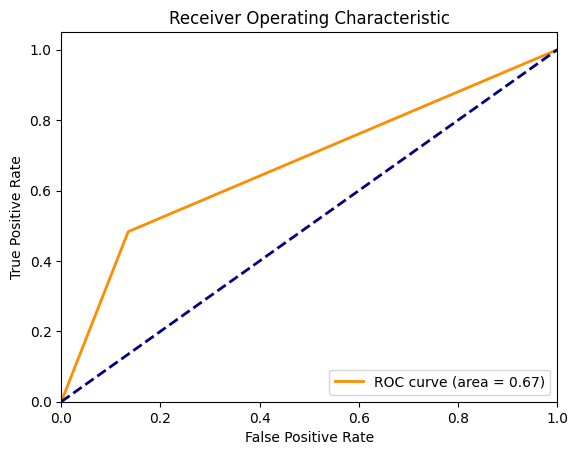

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt 

fpr, tpr, threshold_roc = roc_curve(Y_titanic_test, y_titanic_hat)
roc_auc = auc(fpr, tpr)


# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Regression Evaluation Metrics

- __Mean Squared Error:__ The average of the squared differences between the predicted and actual values.
- __Mean Absolute Error:__ The average of the absolute differences between the predicted and actual values.
- __R-Squared:__ The proportion of the variance in the dependent variable that is predictable from the independent variables.
- __Adjusted R-Squared:__ A modified version of R-squared that adjusts for the number of predictors in the model.
- __Root Mean Squared Error:__ The square root of the mean squared error.